## Observations and Insights 

In [48]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
lab_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
lab_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [50]:
lab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [51]:
# Checking the number of mice in the DataFrame.
mouse_count = len(lab_df["Mouse ID"].unique())
mouse_count

249

In [52]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = lab_df.loc[lab_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data = lab_df.loc[lab_df["Mouse ID"]=="g989"]
dup_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = lab_df[lab_df["Mouse ID"].isin(dup_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [55]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

sum_stats = pd.DataFrame(clean_df.groupby("Drug Regimen").count())

sum_stats["Mean"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
sum_stats["Median"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
sum_stats["Variance"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
sum_stats["Standard Deviation"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
sum_stats["SEM"] = pd.DataFrame(clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

sum_stats = sum_stats[["Mouse ID","Mean", "Median", "Variance", "Standard Deviation", "SEM"]]
sum_stats = sum_stats.sort_values("Mean", ascending=True)
sum_stats

,Mouse ID,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar Plots

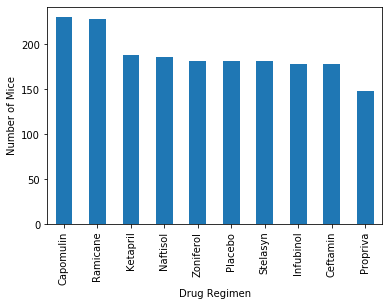

In [57]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
x_axis = clean_df["Drug Regimen"].value_counts()
x_axis
x_axis.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

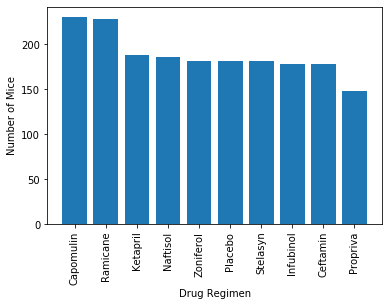

In [58]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = clean_df["Drug Regimen"].value_counts()
plt.bar(x_axis.index.values, x_axis.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

## Pie Plots

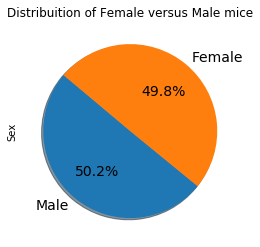

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = mouse_metadata.Sex.value_counts()
gender_count
gender_count.plot(kind="pie", autopct="%1.1f%%", startangle=140, shadow=True, fontsize=14, title= "Distribuition of Female versus Male mice")
plt.show()

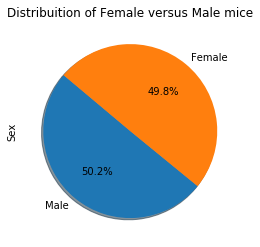

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = mouse_metadata.Sex.value_counts()
plt.pie(gender_count.values, labels=gender_count.index.values, autopct="%1.1f%%", startangle=140, shadow=True)
plt.ylabel("Sex")
plt.title("Distribuition of Female versus Male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
sum_stats.head(4)

,Mouse ID,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,,
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821


In [83]:
#Create a list of the four drugs and a subset data frame
four_drugs_list = ["Ramicane", "Capomulin", "Propriva", "Ceftamin"]
four_drugs = clean_df[clean_df["Drug Regimen"].isin(four_drugs_list)]
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [84]:
#Determine if there are any potencial outliers
quartiles = four_drugs['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile Tumor Volume is: {lowerq}")
print(f"The upper quartile Tumor Volume is: {upperq}")
print(f"The interquartile range Tumor Volume is: {iqr}")
print(f"The the median Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile Tumor Volume is: 40.004805935
The upper quartile Tumor Volume is: 49.1865658075
The interquartile range Tumor Volume is: 9.181759872500002
The the median Tumor Volume is: 45.0 
Values below 26.232166126249997 could be outliers.
Values above 62.95920561625 could be outliers.


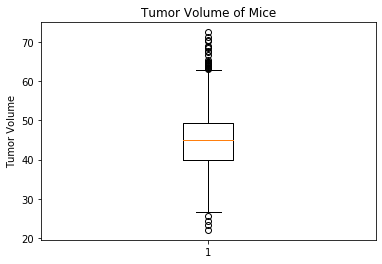

In [90]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volume = four_drugs['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

## Line and Scatter Plots

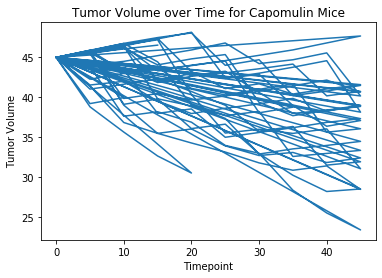

In [92]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter original data for just the Capomulin Drug Regime
Capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin"),:]

# Set variables to hold relevant data
timepoint = Capomulin_df["Timepoint"]
tumor_volume = Capomulin_df["Tumor Volume (mm3)"]

# Plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show()

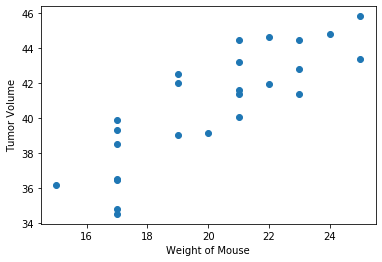

In [93]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

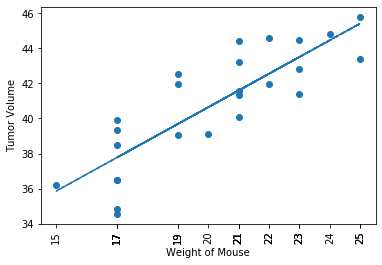

The correlation between weight and tumor value is 0.84


In [94]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')